In [1]:
!pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 6.2 MB/s eta 0:00:00


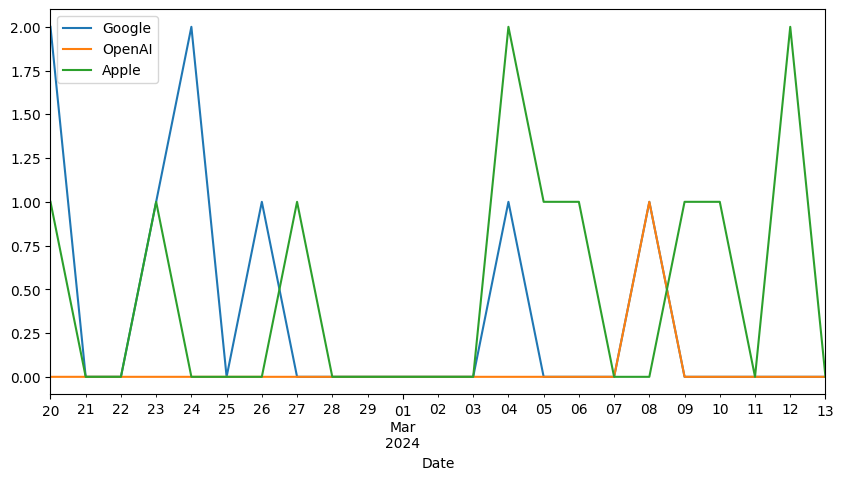

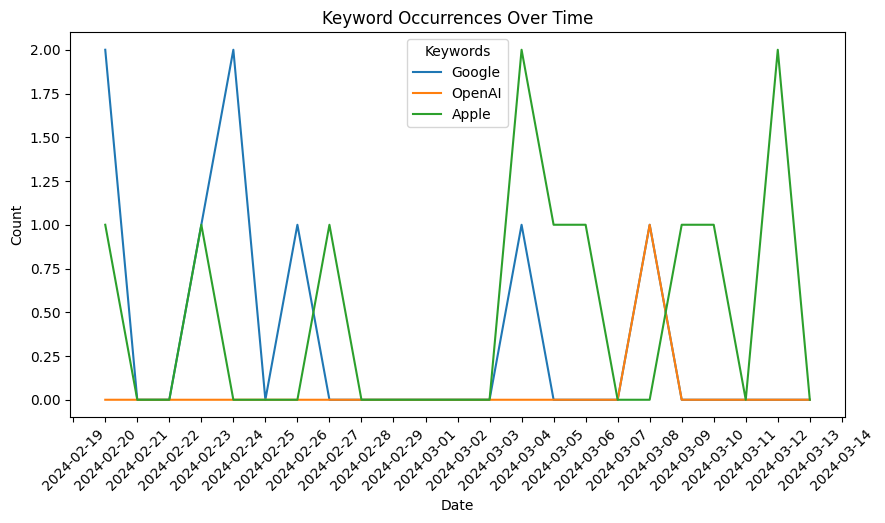

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import ast
import matplotlib.dates as mdates

df = pd.read_csv('export_2024-03-13.csv', header=None, names=['ID', 'Keywords', 'Date'])

def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return []
    except SyntaxError:
        return []
        
df['Keywords'] = df['Keywords'].apply(safe_literal_eval)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df.dropna(subset=['Date'], inplace=True)

all_dates = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
all_dates_df = pd.DataFrame(all_dates, columns=['Date'])

# Explode the DataFrame so each keyword has its own row, keeping the date
df_exploded = df.explode('Keywords')

keyword_counts_per_date = df_exploded.groupby('Date')['Keywords'].value_counts().unstack(fill_value=0)
keyword_counts_per_date.reset_index(inplace=True)

complete_keyword_counts = all_dates_df.merge(keyword_counts_per_date, on='Date', how='left').fillna(0)

selected_keywords = ['Google', 'OpenAI', 'Apple']  

complete_keyword_counts.set_index('Date', inplace=True)  # Set 'Date' as index for plotting
complete_keyword_counts[selected_keywords].plot(kind='line', figsize=(10, 5)) 
plt.figure(figsize=(10, 5)) 
plt.plot(complete_keyword_counts.index, complete_keyword_counts[selected_keywords])
plt.title('Keyword Occurrences Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.legend(selected_keywords, title='Keywords')

plt.show()